<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#F2CC5D;font-family:newtimeroman;color:#27251F;font-size:200%;text-align:center;border-radius:9px 9px;">SPACESHIP TITANIC EDA and MACHINE LEARNING</p>

![](http://cdn.mos.cms.futurecdn.net/JiS4PEwGauuvyu7iWW8fZS.jpg)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#F2CC5D;font-family:newtimeroman;color:#FFF9ED;font-size:200%;text-align:center;border-radius:9px 9px;">TABLE OF CONTENTS</p>   
    
* [1. INTRODUCTION](#1)
    
* [2. IMPORTING NECESSARY LIBRARIES](#2)
    
* [3. LOADING DATASET](#3)
    
* [4. INITIAL INFORMATION ABOUT DATASET](#4)
    
    * [4.1. Look at train dataset](#4.1)    
    * [4.2. Look at test dataset](#4.2)    
    * [4.3. Change column names of train and test datasets](#4.3)    
    * [4.4. Change values of some variables](#4.4)
    * [4.5. Get the number of rows and columns of train and test datasets](#4.5)
    * [4.6. Get common information about train dataset](#4.6)    
    * [4.7. Get descriptive statistics of numeric variables of train dataset](#4.7)    
    * [4.8. How many passengers have not spent any money?](#4.8)    
    * [4.9. Get descriptive statistics of categoric variables of train dataset](#4.9)    
    * [4.10. Check null values of train dataset](#4.10)
    * [4.11. Visualize missing values](#4.11)
    * [4.12. Fill null values with median (numeric) and frequent values (categoric)](#4.12)    
    * [4.13. Check null values again](#4.13)    
    * [4.14. Get the names of categoric variables](#4.14)    
    * [4.15. Get the names of numeric variables](#4.15)    
    * [4.16. Get class frequencies of some variables](#4.16)    
    * [4.17. Check correlation between the variables](#4.17)    


    
* [5. DATA VISUALIZATION](#5)
    
    * [5.1. Histogram](#5.1)    
    * [5.2. Get the number of age periods of passengers](#5.2)    
    * [5.3. Barplot](#5.3)    
    * [5.4. Catplot](#5.4)
    * [5.5. Regplot](#5.5)
    * [5.6. Heatmap](#5.6)
    * [5.7. Pandas crosstab](#5.7)
    * [5.8. Visualization with AutoViz](#5.8)
     
    
* [6. Statistical ANOVA Test for Feature Selection](#6)
    
      
* [7. DATA PREPROCESSING ](#7)
    
    * [7.1. Look at train dataset](#7.1)
    * [7.2. Managing outliers](#7.2)
    * [7.3. Create new features - Feature engineering](#7.3)    
    * [7.4. Encoding the variables of train dataset](#7.4)    
    * [7.5. Get shapes of x and y sets](#7.5)    
    * [7.6  Look at one-hot encoded version of x and y sets](#7.6)
    * [7.7. Splitting the train dataset into x_train (y_train) and x_test (y_test) sets](#7.7)
    * [7.8. Standartization](#7.8)
    
        
* [8. XTREME GRAIDENT BOOSTING (XGB)](#8)
    
    * [8.1. Build XGBoost model and search best hyperparameters with GridSearchCV method](#8.1)
    * [8.2. Build XGB model with best hyperparameters](#8.2)
    * [8.3. Make initial prediction](#8.3)
    * [8.4. Classification report](#8.4)
    * [8.5. ROC AUC](#8.5)
    * [8.6. Confusion matrix](#8.6)
    * [8.7. Build model with full data](#8.7)
    
* [9. SUBMISSION PROCESS (on test.csv)](#9)
    
    * [9.1. Look at test_data](#9.1)
    * [9.2. Change values of some variables](#9.2)
    * [9.3. Keep outside 'id' variable](#9.3)
    * [9.4. One-hot encoding test_data](#9.4)
    * [9.5. Make prediction](#9.5)
    * [9.6. Create submission file](#9.6)
    * [9.7. Save submission file](#9.7)

<a id="1"></a>

## <b>1 <span style='color:#4a8fdd'>|</span> INTRODUCTION</b>

<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h3 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Brief information about datasets and variables</center></h3>  
    
    
In this kernel we will predict whether a passenger was transported to an alternate dimension 
    during the Spaceship Titanic's collision with the spacetime anomaly.

File and Data Field Descriptions
    
* ****PassengerId**** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* ****HomePlanet**** - The planet the passenger departed from, typically their planet of permanent residence.
* ****CryoSleep**** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* ****Cabin**** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* ****Destination**** - The planet the passenger will be debarking to.
* ****Age**** - The age of the passenger.
* ****VIP**** - Whether the passenger has paid for special VIP service during the voyage.
* ****RoomService****, ****FoodCourt****, ****ShoppingMall****, ****Spa****, ****VRDeck**** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* ****Name**** - The first and last names of the passenger.
* ****Transported**** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    
    
For more details: https://www.kaggle.com/competitions/spaceship-titanic/

<a id="2"></a>

### <b>2<span style='color:#4a8fdd'>|</span> IMPORT NECESSARY LIBRARIES</b>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

import random
from nltk.corpus import names
import nltk
nltk.download("names")
from nltk import NaiveBayesClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from collections import Counter


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

matplotlib.rc("xtick", labelsize = 14) 
matplotlib.rc("ytick", labelsize = 14)

from sklearn import set_config
set_config(print_changed_only = False)

import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>

### <b>3<span style='color:#4a8fdd'>|</span> LOAD DATASETS</b>

In [ ]:
train_data = pd.read_csv("../input/spaceship-titanic/train.csv")
test_data = pd.read_csv("../input/spaceship-titanic/test.csv")

<a id="4"></a>

### <b>4<span style='color:#4a8fdd'>|</span> INITIAL INFORMATION ABOUT DATASET </b>

<a id="4.1"></a>

##### <b>4.1 <span style='color:#4a8fdd'>|</span> Look at train dataset</b>

In [ ]:
train_data.head()

<a id="4.2"></a>

##### <b>4.2 <span style='color:#4a8fdd'>|</span> Look at test dataset</b>

In [ ]:
test_data.head()

<a id="4.3"></a>

##### <b>4.3 <span style='color:#4a8fdd'>|</span> Change column names of train and test datasets</b>

In [ ]:
datasets = [train_data, test_data]
for data in datasets:
    data.rename(columns = {"PassengerId" : "id", "HomePlanet" : "home_planet", 
                   "CryoSleep" : "cryo_sleep", "Cabin" : "cabin", 
                   "Destination" : "destination", "Age" : "age",
                   "VIP" : "vip", "RoomService" : "room_service",
                   "FoodCourt" : "food_court", "ShoppingMall" : "shopping_mall",
                   "Spa" : "spa", "VRDeck" : "vr_deck", "Name" : "name",
                   "Transported" : "transported"}, inplace = True)

<a id="4.4"></a>

##### <b>4.4 <span style='color:#4a8fdd'>|</span> Change values of some variables</b>

In [ ]:
train_data["transported"] = train_data["transported"].replace(to_replace = [False, True], 
                                  value = ["No", "Yes"])
train_data["vip"] = train_data["vip"].replace(to_replace = [False, True], 
                                  value = ["No", "Yes"]).astype("object")
train_data["cryo_sleep"] = train_data["cryo_sleep"].replace(to_replace = [False, True], 
                                  value = ["No", "Yes"]).astype("object")

<a id="4.5"></a>

##### <b>4.5 <span style='color:#4a8fdd'>|</span> Get the number of rows and columns of train and test datasets</b>

In [ ]:
print("The number of rows in train data is {0}, and the number of columns in train data is {1}".
      format(train_data.shape[0], train_data.shape[1]))
      
print("The number of rows in test data is {0}, and the number of columns in test data is {1}".
      format(test_data.shape[0], test_data.shape[1]))

<a id="4.6"></a>

##### <b>4.6 <span style='color:#4a8fdd'>|</span> Get common information about train dataset</b>

In [ ]:
train_data.info()

<a id="4.7"></a>

##### <b>4.7 <span style='color:#4a8fdd'>|</span> Get descriptive statistics of numeric variables of train dataset</b>

In [ ]:
train_data.describe().T

<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>What can we see from this statistic?</center></h4>  
    
    
- The average age of passengers on board is 29, the oldest passenger is 79 years old
- The average cost of passengers for the use of shopping mall is 174, and the maximum cost is 23492
- The average cost of passengers for the use of spa is 311, and the maximum cost is 22408
- The average cost of passengers for the use of VR deck is 305, and the maximum cost is 24133
- The average cost of passengers for the use of room services is 225, and the maximum cost is 14327
- The average cost of passengers for the use of food court is 458, and the maximum cost is 29813

<a id="4.8"></a>

##### <b>4.8 <span style='color:#4a8fdd'>|</span> How many passengers have not spent any money?</b>

In [ ]:
not_billed_data = train_data[(train_data["room_service"] == 0)
                         & (train_data["spa"] == 0)
                         & (train_data["food_court"] == 0) 
                         & (train_data["shopping_mall"] == 0)
                         & (train_data["vr_deck"] == 0)]

mean_age = not_billed_data["age"].mean().round()
print("There are {0} passengers on the board of the spaceship who have not spent money, their average age is {1}"
      .format(not_billed_data.shape[0], mean_age))

<a id="4.9"></a>

##### <b>4.9 <span style='color:#4a8fdd'>|</span> Get descriptive statistic of categoric variables of train dataset</b>

In [ ]:
train_data.describe(include = "object").T

<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>What can we see from this statistic?</center></h4>  
    
- From here we can see that most of the passengers are from the Earth planet. Majority of them were traveling to TRAPPIST-1e. 'Gollux Reedall' is only name in dataset that repeated two times. The number of transported passengers are more than not transported.

<a id="4.10"></a>

##### <b>4.10 <span style='color:#4a8fdd'>|</span> Check null values of train dataset</b>

In [ ]:
train_data.isnull().sum()

<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Missing values</center></h4>  
    
- There are many missing values in the columns of the dataset (except 'id' and 'transported' columns)

<a id="4.11"></a>

##### <b>4.11 <span style='color:#4a8fdd'>|</span> Visualize missing values</b>

In [ ]:
msno.matrix(train_data)

In [ ]:
msno.bar(train_data);

<a id="4.12"></a>

##### <b>4.12 <span style='color:#4a8fdd'>|</span> Fill null values with median (numeric) and frequent values (categoric)</b>

In [ ]:
numeric_data = [column for column in train_data.select_dtypes(["int", "float"])]
categoric_data = [column for column in train_data.select_dtypes(exclude = ["int", "float"])]
test_categoric_data = [column for column in test_data.select_dtypes(exclude = ["int", "float"])]

for col in numeric_data:
    train_data[col].fillna(train_data[col].median(), inplace = True)
    test_data[col].fillna(test_data[col].median(), inplace = True)
    
#replace missing values in each categorical column with the most frequent value
for col in categoric_data:
    train_data[col].fillna(train_data[col].value_counts().index[0], inplace = True)
for col in test_categoric_data:
    test_data[col].fillna(test_data[col].value_counts().index[0], inplace = True) 

<a id="4.13"></a>

##### <b>4.13 <span style='color:#4a8fdd'>|</span> Check null values again</b>

In [ ]:
train_data.isnull().sum().sum() + test_data.isnull().sum().sum()

<a id="4.14"></a>

##### <b>4.14 <span style='color:#4a8fdd'>|</span> Get the names of categoric variables</b>

In [ ]:
print("Columns in object data type: \n",
      list((train_data.select_dtypes("object").columns)))

<a id="4.15"></a>

##### <b>4.15 <span style='color:#4a8fdd'>|</span> Get the names of numeric variables</b>

In [ ]:
print("Columns in numeric data type: \n",
      list((train_data.select_dtypes(["int", "float"]).columns)))

<a id="4.16"></a>

##### <b>4.16 <span style='color:#4a8fdd'>|</span> Get class frequencies of some variables</b>

In [ ]:
print("Class frequencies of 'home_planet' variable: \n\n",
      train_data["home_planet"].value_counts())
print("___________________________________________")

print("Class frequencies of 'destination' variable: \n\n",
      train_data["destination"].value_counts())

<a id="4.17"></a>

##### <b>4.17 <span style='color:#4a8fdd'>|</span> Check correlation between the variables of train dataset</b>

In [ ]:
train_data.corr()

<a id="5"></a>

### <b>5<span style='color:#4a8fdd'>|</span> DATA VISUALIZATION </b>

<a id="5.1"></a>

##### <b>5.1<span style='color:#4a8fdd'>|</span> Histogram</b>

In [ ]:
train_data.hist(bins = 25, figsize = (12, 12))
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(30, 10))
axes = axes.flatten()
sns.histplot(ax = axes[0], x = train_data["age"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'age' variable");

sns.histplot(ax = axes[1], x = train_data["room_service"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'room_service' variable");

sns.histplot(ax = axes[2], x = train_data["food_court"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'food_court' variable");

sns.histplot(ax = axes[3], x = train_data["shopping_mall"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'shopping_mall' variable");

sns.histplot(ax = axes[4], x = train_data["spa"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'spa' variable");

sns.histplot(ax = axes[5], x = train_data["vr_deck"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'vr_deck' variable");

print("\n Analyzing the graphs here, it turns out that the values of the variables are not normally distributed. \n")

<a id="5.2"></a>

##### <b>5.2<span style='color:#4a8fdd'>|</span> Get the number of age periods of passengers</b>

In [ ]:
datasets = [train_data, test_data]
for data in datasets:
    baby = train_data[train_data["age"] <= 5]
    kid = train_data[(train_data["age"] > 5) & (train_data["age"] <= 10)]
    teenager = train_data[(train_data["age"] > 10) & (train_data["age"] <= 20)]
    youth = train_data[(train_data["age"] > 20) & (train_data["age"] <= 40)]
    adult = train_data[(train_data["age"] > 40) & (train_data["age"] <= 60)]
    old = train_data[(train_data["age"] > 60)]
        
print("Number of baby passengers: ", baby.shape[0])
print("Number of kid passengers: ", kid.shape[0])
print("Number of teenager passengers: ", teenager.shape[0])
print("Number of youth passengers: ", youth.shape[0])
print("Number of adult passengers: ", adult.shape[0])
print("Number of old passengers: ", old.shape[0])

<a id="5.3"></a>

##### <b>5.3<span style='color:#4a8fdd'>|</span> Barplot</b>

In [ ]:
ages = {"baby" : baby.shape[0], "kid" : kid.shape[0],
        "teenager" : teenager.shape[0], "youth" : youth.shape[0],
        "adult" : adult.shape[0], "old" : old.shape[0]}
ages = pd.Series(ages)

plt.figure(figsize = (11, 6))
plt.title("age categories", fontsize = 15)
plt.xlabel("number of passengers", fontsize = 13)

plt.barh(ages.index, ages.values, color = sns.color_palette("inferno_r", 5),
         height = 0.5)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.flatten()
sns.set_theme(style = "whitegrid")
sns.barplot(ax = axes[0], x = train_data["transported"].value_counts().index,
            y = train_data["transported"].value_counts(),
            data = train_data, saturation = 1).set(title = "Transported or not transported");

sns.barplot(ax = axes[1], x = train_data["cryo_sleep"].value_counts().index,
            y = train_data["cryo_sleep"].value_counts(),
            data = train_data, saturation = 1).set(title = "cryo_sleep condition");

sns.barplot(ax = axes[2], x = train_data["vip"].value_counts().index,
            y = train_data["vip"].value_counts(),
            data = train_data, saturation = 1).set(title = "being VIP condition");

sns.barplot(ax = axes[3], x = train_data["destination"].value_counts().index,
            y = train_data["destination"].value_counts(),
            data = train_data, saturation = 1).set(title = "Destination");

<a id="5.4"></a>

##### <b>5.4<span style='color:#4a8fdd'>|</span> Catplot</b>

In [ ]:
sns.catplot(x = "transported",
            y = "age",
            kind = "box",
            color = '#100C8E',
            data = train_data).set(title = "Age and transporting condition of passenger");

In [ ]:
sns.catplot(x = "transported",
            y = "vr_deck",
            kind = "boxen",
            hue = "vip",
            ci = "sd",
            color = '#B3EE22',
            data = train_data, saturation = 1, height = 7, aspect = 1.3,
            margin_titles = True);

<a id="5.5"></a>

##### <b>5.5<span style='color:#4a8fdd'>|</span> Regplot</b>

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
axes = axes.flatten()

sns.regplot(ax = axes[0], x = "age", y = "room_service", data = train_data);
sns.regplot(ax = axes[1], x = "age", y = "spa", data = train_data);
sns.regplot(ax = axes[2], x = "age", y = "shopping_mall", data = train_data);
sns.regplot(ax = axes[3], x = "age", y = "food_court", data = train_data);

<a id="5.6"></a>

##### <b>5.6<span style='color:#4a8fdd'>|</span> Heatmap</b>

In [ ]:
plt.figure(figsize = [15, 10], clear = True, facecolor = 'white')
sns.heatmap(train_data.corr(), annot = True, square = False, linewidths = 2,
            linecolor = "white", cmap = "summer");

<a id="5.7"></a>

##### <b>5.7<span style='color:#4a8fdd'>|</span> Pandas crosstab</b>

In [ ]:
pd.crosstab(train_data["vip"], train_data["transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (17, 10), subplots = True, stacked=True);

In [ ]:
pd.crosstab(train_data["home_planet"], train_data["transported"],
            normalize = True).plot(kind = "pie",
                                   figsize = (20, 20), colormap = "viridis_r",
                                   subplots = True, stacked=True);

In [ ]:
pd.crosstab(train_data["destination"], train_data["transported"],
            normalize = True).plot(kind = "area",
                                   figsize = (10, 10), colormap = "prism",
                                   subplots = True, stacked=True);

<a id="5.8"></a>

##### <b>5.8<span style='color:#4a8fdd'>|</span> Visualization with AutoViz</b>

In [ ]:
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
av = AutoViz_Class()
dftc = av.AutoViz(filename = '', sep = '', dfte = train_data)

<a id="6"></a>

### <b>6<span style='color:#4a8fdd'>|</span> Statistical ANOVA Test for Feature Selection </b>

<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>What is ANOVA test?</center></h4>  
    
ANOVA stands for Analysis of Variance. It’s a statistical test that was developed by Ronald Fisher in 1918 and has been in use ever since. Put simply, ANOVA tells you if there are any statistical differences between the means of three or more independent groups.

For more information:    
https://www.qualtrics.com/experience-management/research/anova/

In [ ]:
numeric_data = [column for column in train_data.select_dtypes(["int", "float"])]

for column in numeric_data:
  df_anova = train_data[[column,'transported']]
  grouped_anova = df_anova.groupby(['transported'])
  f_value, p_value = stats.f_oneway(grouped_anova.get_group('Yes')[column],
                                    grouped_anova.get_group('No')[column])
  result = ""
  if p_value < 0.05:
    result = "{} is important feature for prediction".format(column)
  else:
    result = "{} is not an important feature for prediction".format(column)
  print(result)

<a id="7"></a>

### <b>7<span style='color:#4a8fdd'>|</span> DATA PREPROCESSING </b>

<a id="7.1"></a>

##### <b>7.1<span style='color:#4a8fdd'>|</span> Look at train dataset</b>

In [ ]:
train_data.head()

<a id="7.2"></a>

##### <b>7.2<span style='color:#4a8fdd'>|</span> Managing outliers</b>

In [ ]:
def outlier_detection_train(df, n, columns):
    rows = []
    will_drop_train = []
    for col in columns:
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_point = 1.5 * IQR
        rows.extend(df[(df[col] < Q1 - outlier_point)|(df[col] > Q3 + outlier_point)].index)
    for r, c in Counter(rows).items():
        if c >= n: will_drop_train.append(r)
    return will_drop_train

In [ ]:
will_drop_train = outlier_detection_train(train_data, 5 ,train_data.select_dtypes(["float", "int"]).columns)
train_data.drop(will_drop_train, inplace = True, axis = 0)

<a id="7.3"></a>

##### <b>7.3<span style='color:#4a8fdd'>|</span> Create new features - Feature engineering</b>

In [ ]:
# Create 'deck' and 'side' features from 'cabin' column

train_data["deck"] = train_data["cabin"].apply(lambda x:str(x).split("/")[0])
test_data['deck'] = test_data['cabin'].apply(lambda x:str(x).split('/')[0])

train_data["side"] = train_data["cabin"].apply(lambda x: x.split("/")[2])
test_data["side"] = test_data["cabin"].apply(lambda x: x.split("/")[2])

In [ ]:
# Financial situation of passengers

train_data["total_bill"] = train_data["room_service"] + train_data["food_court"] + train_data["shopping_mall"] + train_data["spa"] + train_data["vr_deck"] 
train_data["financial_situation"] = train_data["total_bill"].apply(lambda x: "poor" if x < 5000 else ("middle" if x>5000 and x<20000 else "rich"))

test_data["total_bill"] = test_data["room_service"] + test_data["food_court"] + test_data["shopping_mall"] + test_data["spa"] + test_data["vr_deck"] 
test_data["financial_situation"] = test_data["total_bill"].apply(lambda x: "poor" if x < 5000 else ("middle" if x>5000 and x<20000 else "rich"))

In [ ]:
# create new feature ('in_group') from "PassengerID" variable

train_data["group_id"] = train_data["id"].apply(lambda x: x.split("_")[0])
test_data["group_id"] = test_data["id"].apply(lambda x: x.split("_")[0])
train_data["group_number"] = train_data["id"].apply(lambda x: x.split("_")[1])
test_data["group_number"] = test_data["id"].apply(lambda x: x.split("_")[1])

train_g = train_data[train_data["group_id"].duplicated()]["group_id"]
test_g = test_data[test_data["group_id"].duplicated()]["group_id"]
train_data["in_group"] = train_data["group_id"].apply(lambda x: x in train_g.values)
test_data["in_group"] = test_data["group_id"].apply(lambda x: x in test_g.values)


<div style="border-radius:10px;
            border : black solid;
            background-color: #F2CC5D;
            font-size:110%;
            text-align: left">

<h4 style='; border:0; border-radius: 15px; font-weight: bold; color:black'><center>Acknowledgement</center></h4>  
    
Natural Language Toolkit (NLTK) is a platform used for building programs for text analysis. We can observe that male and female names have some distinctive characteristics. Names ending in a, e and i are likely to be female, while names ending in k, o, r, s and t are likely to be male.
    
The following resource was used to prepare the code block here

https://www.geeksforgeeks.org/python-gender-identification-by-name-using-nltk/

In [ ]:
# FOR TRAIN_DATA

# get names from the 'name' columns of train_data

names_train_data = []
for n in train_data["name"]:
    a = n.split()
    names_train_data.append(a[0])

In [ ]:
# define function to get last words from the name

def gender_features(word):
    return {'last_letter': word[-1]}

In [ ]:
labeled_names = [(name, "female") for name in names.words("female.txt")] + [(name, "male") for name in names.words("male.txt")]
random.shuffle(labeled_names)

In [ ]:
# we use "gender_features" function to extract the features

featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
classifier = NaiveBayesClassifier.train(featuresets)

In [ ]:
names_gender = []
for i in names_train_data:
    names_gender.append(classifier.classify(gender_features(i)))

# create new column called 'gender'    
train_data["gender"] = names_gender

In [ ]:
# FOR TEST_DATA


# get names from the 'name' columns of test_data

names_test_data = []
for n in test_data["name"]:
    a = n.split()
    names_test_data.append(a[0])

In [ ]:
labeled_names = [(name, "male") for name in names.words("male.txt")] + [(name, "female") for name in names.words("female.txt")]
random.shuffle(labeled_names)

In [ ]:
# we use "gender_features" function to extract the features
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
classifier = NaiveBayesClassifier.train(featuresets)

In [ ]:
names_gender = []
for i in names_test_data:
    names_gender.append(classifier.classify(gender_features(i)))
    
# create new column called 'gender'    
test_data["gender"] = names_gender

<a id="7.4"></a>

##### <b>7.4<span style='color:#4a8fdd'>|</span> Encoding the variables of train dataset</b>

In [ ]:
lbe = LabelEncoder()
lbe.fit_transform(train_data["transported"])
train_data["transported"] = lbe.fit_transform(train_data["transported"])

y = train_data["transported"]

train_data = train_data.drop(["id", "name", "cabin", "total_bill", "group_id", "group_number", "transported"], axis = 1)
x = pd.get_dummies(train_data, drop_first = True)

<a id="7.5"></a>

##### <b>7.5<span style='color:#4a8fdd'>|</span> Get shapes of x and y sets</b>

In [ ]:
print(x.shape)
print(y.shape)

<a id="7.6"></a>

##### <b>7.6<span style='color:#4a8fdd'>|</span> Look at one-hot encoded version of x and y sets</b>

In [ ]:
x.head()

In [ ]:
y.head()

<a id="7.7"></a>

##### <b>7.7<span style='color:#4a8fdd'>|</span> Splitting the train dataset into x_train (y_train) and x_test (y_test) sets</b>

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.10,
                                                    shuffle = True,
                                                    random_state = 1)
print(x_train.shape)
print(x_test.shape)

<a id="7.8"></a>

##### <b>7.8<span style='color:#4a8fdd'>|</span> Standartization</b>

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

<a id="8"></a>

### <b>8<span style='color:#4a8fdd'>|</span> XTREME GRADIENT BOOSTING (XGB) </b>

<a id="8.1"></a>

##### <b>8.1<span style='color:#4a8fdd'>|</span> Build XGBoost model and search best hyperparameters with GridSearchCV method</b>

In [ ]:
'''

xgbc = XGBClassifier()

xgbc_params = {
        "gamma": [0.5, 1, 1.5],
        "subsample": [0.6, 0.8, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0],
        "max_depth": [3, 4, 5],
        "n_estimators": [100, 130, 150]
}

xgbc_cv_model = GridSearchCV(xgbc, xgbc_params, cv = 10, n_jobs = -1)
xgbc_cv_model.fit(x_train, y_train)

print("Best hyperparametres of the model: \n", xgbc_cv_model.best_params_)
'''

<a id="8.2"></a>

##### <b>8.2<span style='color:#4a8fdd'>|</span> Build XGB model with best hyperparameters</b>

In [ ]:
#we get these hyperparameters with GridSearchCV method above

xgbc_tuned = XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 100)
xgbc_tuned = xgbc_tuned.fit(x_train, y_train)

<a id="8.3"></a>

##### <b>8.3<span style='color:#4a8fdd'>|</span> Make initial prediction</b>

In [ ]:
y_pred = xgbc_tuned.predict(x_test)
accuracy_score(y_test, y_pred)

<a id="8.4"></a>

##### <b>8.4<span style='color:#4a8fdd'>|</span> Classification report</b>

In [ ]:
print(classification_report(y_test, y_pred))

<a id="8.5"></a>

##### <b>8.5<span style='color:#4a8fdd'>|</span> ROC AUC</b>

In [ ]:
xgb_roc_auc = roc_auc_score(y_test, xgbc_tuned.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, xgbc_tuned.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC')
plt.show()

<a id="8.6"></a>

##### <b>8.6<span style='color:#4a8fdd'>|</span> Confusion matrix</b>

In [ ]:
plot_confusion_matrix(xgbc_tuned,
                      x_test,
                      y_test,
                      cmap = "summer",
                      normalize = "true");

<a id="8.7"></a>

##### <b>8.7<span style='color:#4a8fdd'>|</span> Build model with full data</b>

In [ ]:
xgbc_model_full = XGBClassifier(gamma = 1.5,
                           subsample = 1.0,
                           max_depth = 5,
                           colsample_bytree = 1.0,
                           n_estimators = 100)
xgbc_model_full = xgbc_model_full.fit(x, y)

<a id="9"></a>

### <b>9<span style='color:#4a8fdd'>|</span>SUBMISSION PROCESS (on test.csv)</b>

<a id="9.1"></a>

##### <b>9.1<span style='color:#4a8fdd'>|</span> Look at test_data</b>

In [ ]:
test_data.head()

<a id="9.2"></a>

##### <b>9.2<span style='color:#4a8fdd'>|</span> Change values of some variables</b>

In [ ]:
test_data["vip"] = test_data["vip"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")
test_data["cryo_sleep"] = test_data["cryo_sleep"].replace(to_replace = [False, True],
                                  value = ["No", "Yes"]).astype("object")

<a id="9.3"></a>

##### <b>9.3<span style='color:#4a8fdd'>|</span> Keep outside 'id' variable</b>

In [ ]:
PassengerID = test_data["id"]
PassengerID.head()

<a id="9.4"></a>

##### <b>9.4<span style='color:#4a8fdd'>|</span> One-hot encoding test_data</b>

In [ ]:
test_data = test_data.drop(["id", "total_bill", "cabin", "group_id", "group_number", "name"], axis = 1)
test_data = pd.get_dummies(test_data, drop_first = True)

<a id="9.5"></a>

##### <b>9.5<span style='color:#4a8fdd'>|</span> Make prediction</b>

In [ ]:
y_pred = pd.Series(xgbc_model_full.predict(test_data)).map({0:False, 1:True})

<a id="9.6"></a>

##### <b>9.6<span style='color:#4a8fdd'>|</span> Create submission file</b>

In [ ]:
submission = pd.DataFrame({"PassengerId": PassengerID.values, "Transported": y_pred})
submission.head()

<a id="9.7"></a>

##### <b>9.7<span style='color:#4a8fdd'>|</span> Save submission file</b>

In [ ]:
submission.to_csv('submission.csv', index = False)
print("My competition submission: \n\n", submission)

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#F2CC5D;font-family:newtimeroman;color:#27251F;font-size:200%;text-align:center;border-radius:9px 9px;">THIS IS NOT THE END. WORK IN PROGRESS</p>

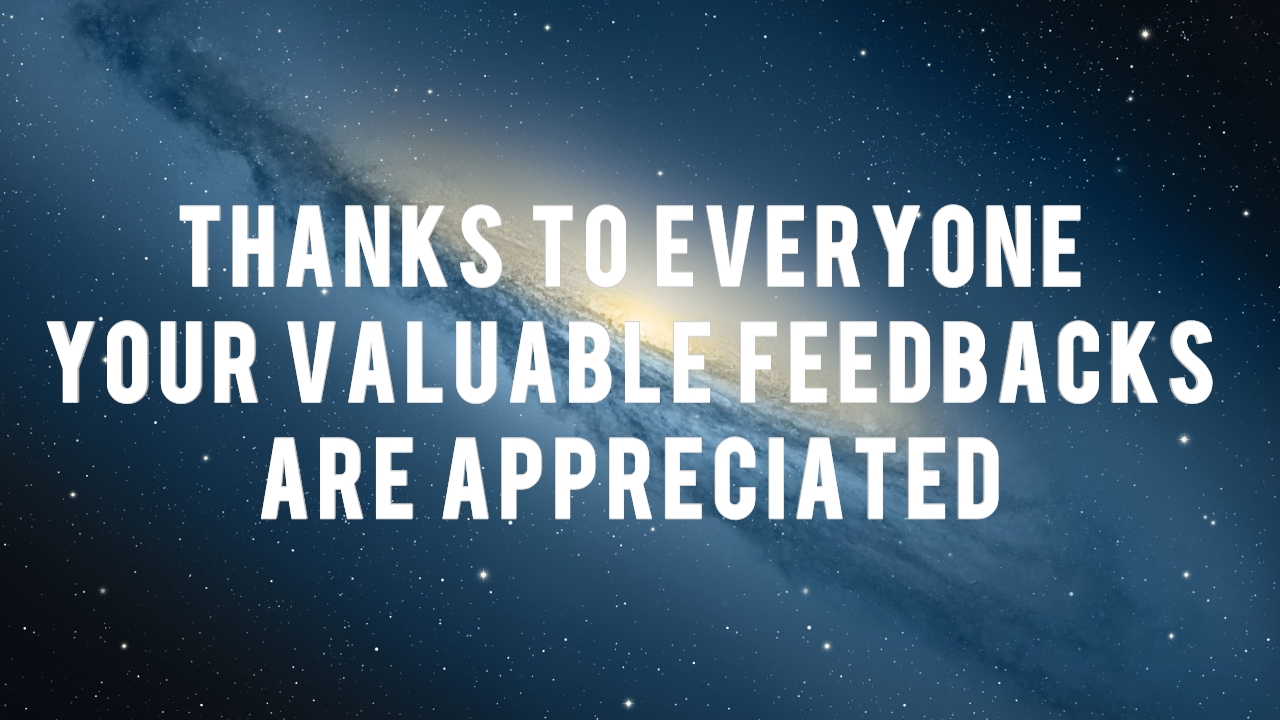

[](http://www.photobox.co.uk/my/photo/full?photo_id=504741600026)